## Semester 1 Project Submission

Please fill out:
* Student name: 
* Instructor name: 


# Maanik Gupta

# Maya Sandlin

41910959.925925925


Text(0, 0.5, 'Revenue (USD)')

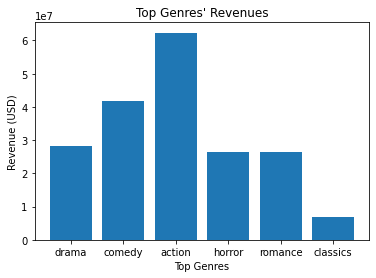

In [1]:
import pandas as pd
import numpy as np
movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv')
rt_movie_info = pd.read_csv('zippedData/rt.movie_info.csv')
rt_review = pd.read_csv('zippedData/rt.reviews.csv', encoding='unicode_escape')
tn_movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv')
tmdb_movies = pd.read_csv('zippedData/tmdb.movies.csv', index_col=0)

movie_genre = rt_movie_info[['genre','box_office']]
clean_genre = movie_genre.dropna()
genres_sorted = movie_genre['genre'].sort_values().dropna()
genres_sorted.value_counts().head (30)
#using this data, the main six categories include: drama, comedy, horror, action, romance, and classics

#determining the average revenue

#drama
drama = clean_genre[clean_genre['genre'].str.contains('Drama')]
drama_revenue = drama ['box_office']
drama_revenue_clean = drama_revenue.dropna()
drama_avg_revenue = np.mean(drama_revenue_clean)
drama_avg_revenue

#comedy
comedy = clean_genre[clean_genre['genre'].str.contains('Comedy')]
comedy_revenue = comedy ['box_office']
comedy_revenue_clean = comedy_revenue.dropna()
comedy_avg_revenue = np.mean(comedy_revenue_clean)
print(comedy_avg_revenue)

#action 
action = clean_genre[clean_genre['genre'].str.contains('Action')]
action_revenue = action ['box_office']
action_revenue_clean = action_revenue.dropna()
action_avg_revenue = np.mean(action_revenue_clean)
action_avg_revenue 

#horror
horror = clean_genre[clean_genre['genre'].str.contains('Horror')]
horror_revenue = horror ['box_office']
horror_revenue_clean = horror_revenue.dropna()
horror_avg_revenue = np.mean(horror_revenue_clean)
horror_avg_revenue

#romance
romance = clean_genre[clean_genre['genre'].str.contains('Romance')]
romance_revenue = horror ['box_office']
romance_revenue_clean = romance_revenue.dropna()
romance_avg_revenue = np.mean(romance_revenue_clean)
romance_avg_revenue

#classics
classics = clean_genre[clean_genre['genre'].str.contains('Classics')]
classic_revenue = classics ['box_office']
classic_revenue_clean = classic_revenue.dropna()
classic_avg_revenue = np.mean(classic_revenue_clean)
classic_avg_revenue


top_genre={"drama":drama_avg_revenue, "comedy":comedy_avg_revenue, "action":action_avg_revenue, "horror": horror_avg_revenue, "romance":romance_avg_revenue, "classics": classic_avg_revenue}

#creating the graph

import matplotlib.pyplot as plt
%matplotlib inline
fig, ax=plt.subplots()
ax.bar(top_genre.keys(),top_genre.values())

ax.set_title("Top Genres' Revenues")
ax.set_xlabel("Top Genres")
ax.set_ylabel("Revenue (USD)")


# Robert Golden

# Daniel Robles

# Jake Umholtz 